**Imports**

In [57]:
from imports import * 
from functions import *
from archs import *
from mylearner import *
%matplotlib inline
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


**Loading annotated data**

In [58]:
from loading_data import *

**Encode target classes (person and window open) classes**

In [59]:
df1 = encode_classes(d1)
df2 = encode_classes(d2)
df = encode_classes(data)

0    18144
1     1440
2      139
4        2
3        1
Name: person, dtype: int64
0    18701
1     1025
Name: window_open, dtype: int64
(19726, 23)
0    43791
1      604
2       50
Name: person, dtype: int64
0    44156
1      289
Name: window_open, dtype: int64
(44445, 23)
0    61935
1     2044
2      189
4        2
3        1
Name: person, dtype: int64
0    62857
1     1314
Name: window_open, dtype: int64
(64171, 23)


**filtering data**

In [60]:
# h2s column has only NaN values, also drop timestamp,datetime,deviceid
df.drop(columns=['h2s','timestamp','deviceid'],inplace=True)
df1.drop(columns=['h2s','timestamp','deviceid'],inplace=True)
df2.drop(columns=['h2s','timestamp','deviceid'],inplace=True)

**Missing values, drop NAN**

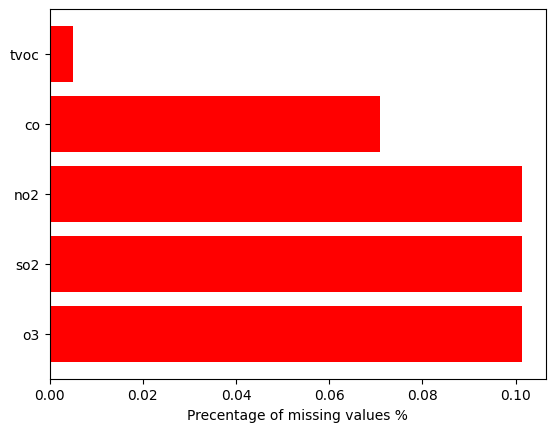

maximum number of missing values per column=  20 

   column  count  percentage
12     o3     20    0.101389
5     so2     20    0.101389
6     no2     20    0.101389
2      co     14    0.070972
9    tvoc      1    0.005069


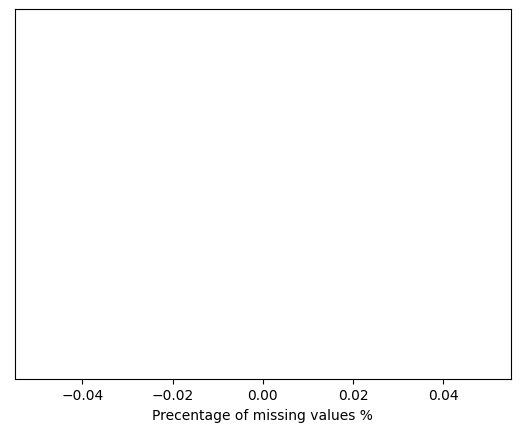

maximum number of missing values per column=  nan 

Empty DataFrame
Columns: [column, count, percentage]
Index: []


In [61]:
plot_missing(df1)
plot_missing(df2)

#### substitute NaN values with mean 
## polynomial interpolation with degree > 1 uses index, also convert dtype to float to work
df1 = impute_NaN(df1)
df2 = impute_NaN(df2)
############## conmbine into df 

df = concat(df1,df2)
df.columns=df1.columns

### drop datetime column and store it before for visualization
datetime_df = df.datetime
datetime_df1 = df1.datetime
datetime_df2 = df2.datetime

df.drop(columns=['datetime'],inplace=True)
df1.drop(columns=['datetime'],inplace=True)
df2.drop(columns=['datetime'],inplace=True)



**minimized dataset for our classification task, drop  rows for testing**

In [62]:

print(df['person'].value_counts(),'\n',df['window_open'].value_counts(),'\n')

#### combine classes of more than 1 person to 1 person as there exists too little of them
lc = df.loc[lambda x: x['person'] > 1]
df.loc[lc.index,'person'] = 1

lc = df1.loc[lambda x: x['person'] > 1]
df1.loc[lc.index,'person'] = 1

lc = df2.loc[lambda x: x['person'] > 1]
df2.loc[lc.index,'person'] = 1

print(df['person'].value_counts(),'\n',df['window_open'].value_counts(),'\n')


############### drop  rows for testing
### november (one month) for testing
df2_test = df2.iloc[df2.shape[0]-22000:df2.shape[0]-21700] ## to get better visualization on less focused data
datetime_test = datetime_df2.iloc[datetime_df2.shape[0]-22000:datetime_df2.shape[0]-21700]
df2 = df2.drop(index = df2.index[df2.shape[0]-22000:]) ### to keep the sequence order drop from last
datetime_df2 = datetime_df2.drop(index = datetime_df2.index[datetime_df2.shape[0]-22000:])


### for visualization
datetime_train = concat(datetime_df1,datetime_df2)
df_train = concat(df1,df2)
df_train.columns=df1.columns

# df2.reset_index(drop=True,inplace=True)
# df2_test.reset_index(drop=True,inplace=True)

df2_test_targets = df2_test.filter(['person','window_open'])
df2_test_features = df2_test.drop(columns=['person','window_open']) 




targets = df.filter(['person','window_open'])
features = df.drop(columns=['person','window_open']) 


targets1 = df1.filter(['person','window_open'])
features1 = df1.drop(columns=['person','window_open']) 

targets2 = df2.filter(['person','window_open'])
features2 = df2.drop(columns=['person','window_open']) 



### minimized data
l_ = ['humidity','temperature','tvoc','oxygen','co2','co','pressure','o3','sound','person','window_open']
f_ = ['humidity','temperature','tvoc','oxygen','co2','co','pressure','o3','sound']
### from leipzig data
# l_ = ['humidity_abs','temperature','tvoc','oxygen','co2','co','no2','o3','person','window_open']
# f_ = ['humidity_abs','temperature','tvoc','oxygen','co2','co','no2','o3']

df_mini1 = df1.filter(l_)
print(df_mini1.shape,'\n',df_mini1['person'].value_counts(),'\n',df_mini1['window_open'].value_counts(),'\n')
features_mini1 = features1.filter(f_)
# print(targets1.iloc[:,0].value_counts())

df_mini2 = df2.filter(l_)
print(df_mini2.shape,'\n',df_mini2['person'].value_counts(),'\n',df_mini2['window_open'].value_counts(),'\n')
features_mini2 = features2.filter(f_)
# print(targets2.iloc[:,0].value_counts())

df2_test_mini = df2_test.filter(l_)
print(df2_test_mini.shape,'\n',df2_test_mini['person'].value_counts(),'\n',df2_test_mini['window_open'].value_counts(),'\n')
df2_test_features_mini = df2_test_features.filter(f_)

## whole df
df_mini = df.filter(l_)
print(df_mini.shape,'\n',df_mini['person'].value_counts(),'\n',df_mini['window_open'].value_counts(),'\n')
features_mini = features.filter(f_)
# print(targets2.iloc[:,0].value_counts())


0    61915
1     2044
2      189
4        2
3        1
Name: person, dtype: int64 
 0    62837
1     1314
Name: window_open, dtype: int64 

0    61915
1     2236
Name: person, dtype: int64 
 0    62837
1     1314
Name: window_open, dtype: int64 

(19706, 11) 
 0    18124
1     1582
Name: person, dtype: int64 
 0    18681
1     1025
Name: window_open, dtype: int64 

(22445, 11) 
 0    21852
1      593
Name: person, dtype: int64 
 0    22206
1      239
Name: window_open, dtype: int64 

(300, 11) 
 0    245
1     55
Name: person, dtype: int64 
 0    259
1     41
Name: window_open, dtype: int64 

(64151, 11) 
 0    61915
1     2236
Name: person, dtype: int64 
 0    62837
1     1314
Name: window_open, dtype: int64 



**Perform undersampling and segmentation**

read yaml config file

In [63]:
with open('config.yaml') as f:
    hyperparams = yaml.load(f,SafeLoader)
    
under_window = hyperparams['sample_segment']['under_window']
seq_len = hyperparams['sample_segment']['seq_len']
stride = hyperparams['sample_segment']['stride']
sliding_mode = hyperparams['sample_segment']['sliding_mode']
all_features = hyperparams['sample_segment']['all_features']

under sample and segment

In [64]:
## undersampling and sliding
sampling = hyperparams['sample_segment']['sampling']
if sampling:
    if all_features:
        X1,y1= under_sample(df1,under_window,seq_len,stride,sliding_mode=sliding_mode)
        X2,y2= under_sample(df2,under_window,seq_len,stride,sliding_mode=sliding_mode)
    else:
        X1,y1= under_sample(df_mini1,under_window,seq_len,stride,sliding_mode=sliding_mode)
        X2,y2= under_sample(df_mini2,under_window,seq_len,stride,sliding_mode=sliding_mode)
else:
    if all_features:
        X1,y1= sliding(seq_len,stride,features1,targets1,mode=sliding_mode)
        X2,y2= sliding(seq_len,stride,features2,targets2,mode=sliding_mode)
    else:
        X1,y1= sliding(seq_len,stride,features_mini1,targets1,mode=sliding_mode)
        X2,y2= sliding(seq_len,stride,features_mini2,targets2,mode=sliding_mode)



X = concat(X1,X2)
y = concat(y1,y2)
X.shape, y.shape


((5054, 9, 7), (5054, 2))

**splitting sets and standardization**

**using sklearn**

In [65]:
###### splitting
# splits = TrainValidTestSplitter(valid_size=0.2,test_size=0.1)(y) ##### we have test set here
splits = TrainValidTestSplitter(valid_size=0.1)(y) ##### we DON'T have test set here
x_train = np.zeros(X[splits[0]].shape,dtype=np.float32)
y_train = y[splits[0]]
x_valid = np.zeros(X[splits[1]].shape,dtype=np.float32)
y_valid = y[splits[1]]
#### if splitted
# x_test = np.zeros(X[splits[2]].shape,dtype=np.float32)
# y_test = y[splits[2]]

#different test set
### uses stride = 1 to check all time points
if all_features:
    x_test_, y_test = sliding(seq_len,1,df2_test_features,df2_test_targets,mode=sliding_mode)
else:
    x_test_, y_test = sliding(seq_len,1,df2_test_features_mini,df2_test_targets,mode=sliding_mode)
x_test = np.zeros(x_test_.shape,dtype=np.float32) 
#################



#### standardization
scalers = {}
for i in range(x_train.shape[1]): ## n_features
    scalers[i] = StandardScaler()
    scalers[i].fit(np.unique((X[splits[0]])[:, i, :]).reshape(-1,1)) ### as we have overlapping samples
    x_train[:, i, :] = scalers[i].transform((X[splits[0]])[:, i, :].reshape(-1,1)).reshape(x_train.shape[0],x_train.shape[-1])
    x_valid[:, i, :] = scalers[i].transform((X[splits[1]])[:, i, :].reshape(-1,1)).reshape(x_valid.shape[0],x_valid.shape[-1])
    # x_test[:, i, :] = scalers[i].transform((X[splits[2]])[:, i, :].reshape(-1,1)).reshape(x_test.shape[0],x_test.shape[-1]) ## from splitting
    x_test[:, i, :] = scalers[i].transform((x_test_)[:, i, :].reshape(-1,1)).reshape(x_test.shape[0],x_test.shape[-1]) ## test set from outside
print(x_train.shape,x_valid.shape,x_test.shape)

(4549, 9, 7) (505, 9, 7) (294, 9, 7)


**tsai LEARNER**

read config file

In [66]:
with open('config.yaml') as f:
    hyperparams = yaml.load(f,SafeLoader)

epochs = hyperparams['model']['epochs']
bs = hyperparams['model']['bs']
num_workers = hyperparams['model']['num_workers']
embed_size = hyperparams['model']['embed_size']

**Train [note freezing the encoder before fitting]**

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.655560,0.602973,0.801980,00:01
1,0.556473,0.528487,0.857426,00:00
2,0.488011,0.452365,0.896040,00:00
3,0.397507,0.362689,0.910891,00:00
4,0.310665,0.278446,0.921782,00:00
5,0.244013,0.221198,0.933663,00:01
6,0.200478,0.170258,0.947525,00:00
7,0.169712,0.146193,0.947525,00:01
8,0.166412,0.136137,0.950495,00:01
9,0.148049,0.140501,0.949505,00:01


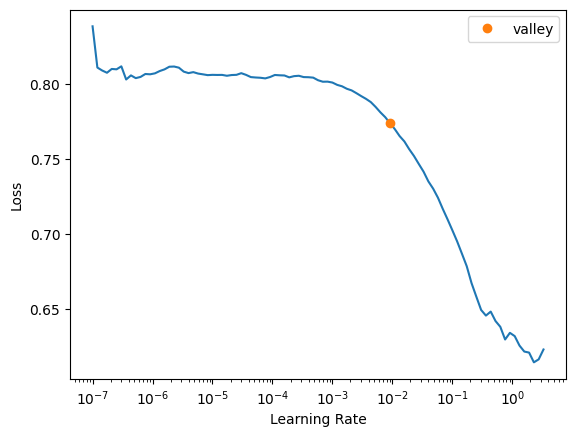

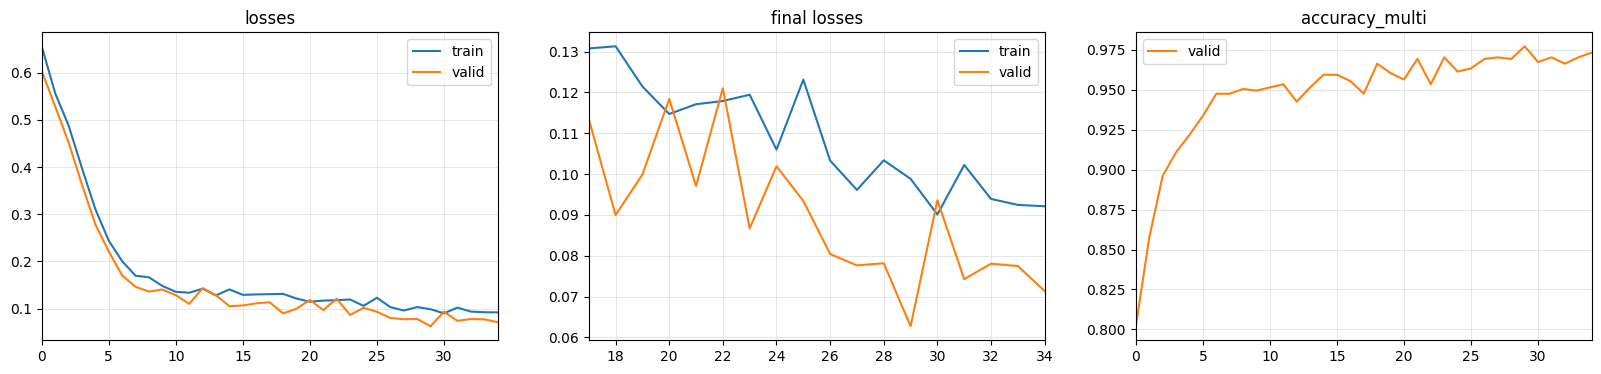

time= 42.63773727416992
No. of trainable parameters= 2306
train loss = 0.092104472219944, valid loss = 0.07136331498622894
FlattenedLoss of BCEWithLogitsLoss()


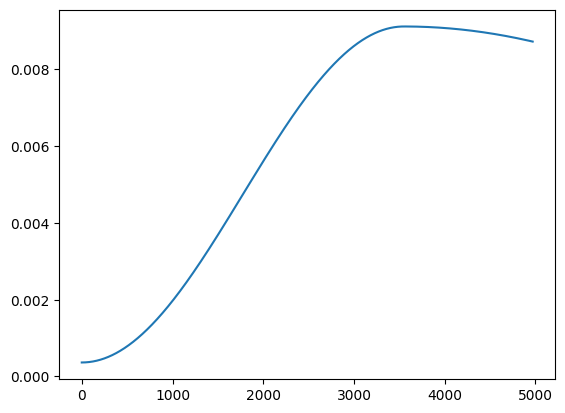

In [69]:
######## remove sigmoid from the network*****************

# tfms  = [None, Categorize()] ## single label
tfms  = [None, MultiCategorize()] ## multi label
batch_tfms = TSStandardize()

## single label
# tsets = TSDatasets(x_train, y_train[:,0], tfms=tfms, inplace=True)
# vsets = TSDatasets(x_valid, y_valid[:,0], tfms=tfms, inplace=True)
## multi label
tsets = TSDatasets(x_train, y_train, tfms=tfms, inplace=True)
vsets = TSDatasets(x_valid, y_valid, tfms=tfms, inplace=True)
######################
dls   = TSDataLoaders.from_dsets(tsets, vsets, bs = bs, num_workers=num_workers)#,batch_tfms=batch_tfms) ### note the normalization

#############################################################
k={'layers':[32,8]}
network = 'FCN'

model = create_model(MyFCN, dls.vars,dls.c,dls,**k)
# learn = Learner(dls, model, metrics=accuracy,cbs = ShowGraph()) ### single label
#### note the accuracy_multi and MultiCategorize() contains BCEwithlogits not normal BCE
learn = Learner(dls, model, metrics=accuracy_multi,cbs = ShowGraph()) ### multi label


###########################################################################
start = time.time()
learn.fit_one_cycle(epochs,learn.lr_find().valley,cbs = EarlyStoppingCallback(monitor='valid_loss', min_delta=0.00001, patience=5)) ## learning rate annealing
elapsed = time.time()-start
print(f'time= {elapsed}')
print(f'No. of trainable parameters= {count_parameters(model)}')
print(f'train loss = {learn.recorder.values[-1][0]}, valid loss = {learn.recorder.values[-1][1]}')
plt.figure()
plt.plot(learn.recorder.lrs)

print(learn.loss_func)
metrics = np.array(learn.recorder.values)

# save the model as state dictionary 
torch.save(learn.model.state_dict(), f'{learn.model._get_name()}.pt')


To read already available networks

In [70]:
# tfms  = [None, MultiCategorize()] ## multi label
# batch_tfms = TSStandardize()

# ## single label
# # tsets = TSDatasets(x_train, y_train[:,0], tfms=tfms, inplace=True)
# # vsets = TSDatasets(x_valid, y_valid[:,0], tfms=tfms, inplace=True)
# ## multi label
# tsets = TSDatasets(x_train, y_train, tfms=tfms, inplace=True)
# vsets = TSDatasets(x_valid, y_valid, tfms=tfms, inplace=True)
# ######################
# dls   = TSDataLoaders.from_dsets(tsets, vsets, bs = bs, num_workers=num_workers)#,batch_tfms=batch_tfms) ### note the normalization

# k={'layers':[32,8]}
# network = 'FCN'


# # load 
# pretrained_dict = torch.load(f'/afs/tu-chemnitz.de/home/urz/a/abom/internship/models/{MyFCN.__name__}.pt')
# model = create_model(MyFCN, dls.vars,dls.c,dls,**k)
# model.load_state_dict(pretrained_dict)

# # learn = Learner(dls, model, metrics=accuracy,cbs = ShowGraph()) ### single label
# #### note the accuracy_multi and MultiCategorize() contains BCEwithlogits not normal BCE
# learn = Learner(dls, model, metrics=accuracy_multi,cbs = ShowGraph()) ### multi label

**EVALUATION ON TEST DATA SET + Using PR curves**

Accuracy [Both]: 98.63946
Accuracy [person]: 98.63946
Accuracy [window_open]: 100.00000


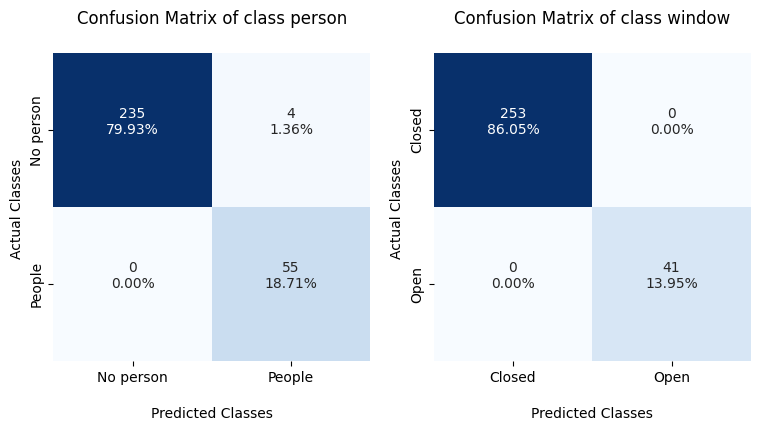

F1 score [person]: 0.9649122807017544

precision [person]: 0.9322033898305084

recall [person]: 1.0

F1 score [window]: 1.0

precision [window]: 1.0

recall [window]: 1.0



In [71]:
#### Adding dataset to apply same dls valid tfms on test

### standardize test set with train parameters (apply Multicategorize transform)
test_set = TSDatasets(x_test, y_test, tfms=tfms, inplace=True) # multi_label
# test_set = TSDatasets(x_test, y_test[:,0], tfms=tfms, inplace=True) # single_label
test_dl   = TSDataLoader(test_set, bs = bs, num_workers=num_workers)#,batch_tfms=batch_tfms) ### note the normalization
# next(iter(test_dl))
 

#### evaluating

test_probas, test_targets, test_preds = learn.get_preds(dl=test_dl,with_decoded=True)#,reorder = False)
test_preds = test_preds.long() ### to convert bool to int

###############################################################################################
###### use PR curve to get best threshold for each class on given test set
##############################################################################################
# # # class person
# # threshold_person, _ = plot_PR_curve('person',test_targets[:,0],test_probas[:,0])
# # ### class window_open
# # threshold_window, _ =plot_PR_curve('window',test_targets[:,1],test_probas[:,1])
# threshold_person,threshold_window = plot_PR_curve_both(test_targets,test_probas)
# test_preds[:,0] = (test_probas[:,0]>=threshold_person)
# test_preds[:,1] = (test_probas[:,1]>=threshold_window)
#################################################################################################

## single label
### number of classes in validation set
# n_classes = pd.DataFrame(test_targets).value_counts().shape[0]
# plot_confusion(test_targets,test_preds,n_classes,name = 'person')
# print(f'Accuracy: {(test_targets == test_preds).float().mean():0.5f}')  
# print(f'F1 score: {f1_score(test_targets,test_preds)}\n') # to get f1 score for each class use (average=None)
# print(f'precision: {precision_score(test_targets,test_preds)}\n') 
# print(f'recall: {recall_score(test_targets,test_preds)}\n') 

## multi label
print(f'Accuracy [Both]: {(100/test_targets.shape[0])*torch.all((test_preds == test_targets),dim=1).sum():0.5f}') ## multi-label
print(f'Accuracy [person]: {(100/test_targets.shape[0])*(test_preds[:,0] == test_targets[:,0]).sum():0.5f}') ## multi-label
print(f'Accuracy [window_open]: {(100/test_targets.shape[0])*(test_preds[:,1] == test_targets[:,1]).sum():0.5f}') ## multi-label
n_classes = test_targets.shape[1]

## confusion matrices
plot_confusion_both(test_targets,test_preds,n_classes)
## person class
# plot_confusion(test_targets[:,0],test_preds[:,0],n_classes,name = 'person')
print(f'F1 score [person]: {f1_score(test_targets[:,0],test_preds[:,0])}\n')
print(f'precision [person]: {precision_score(test_targets[:,0],test_preds[:,0])}\n') 
print(f'recall [person]: {recall_score(test_targets[:,0],test_preds[:,0])}\n') 

### window class
# plot_confusion(test_targets[:,1],test_preds[:,1],n_classes,name = 'window')
print(f'F1 score [window]: {f1_score(test_targets[:,1],test_preds[:,1])}\n') 
print(f'precision [window]: {precision_score(test_targets[:,1],test_preds[:,1])}\n') 
print(f'recall [window]: {recall_score(test_targets[:,1],test_preds[:,1])}\n') 


**investigate distribution of wrong predictions, and smoothing** 

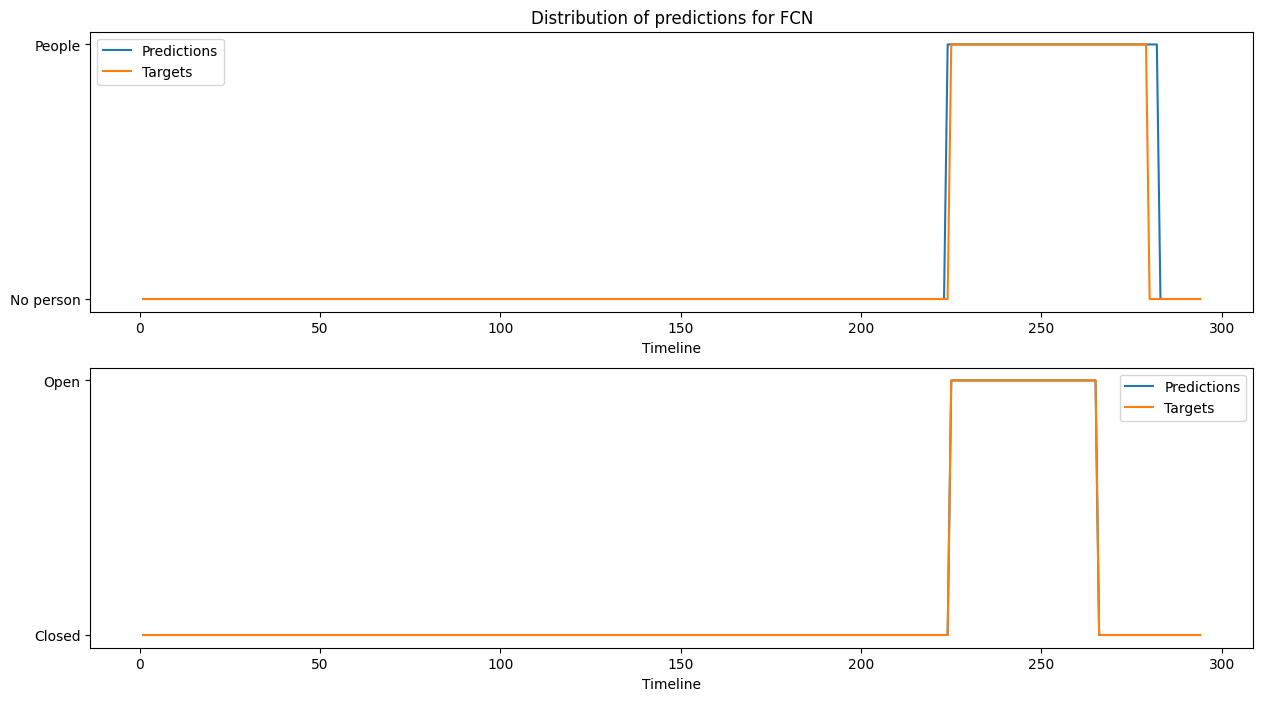

In [72]:
#### single label
# ## plot targets vs predictions person
# plot_distribution(test_targets,test_preds,'person')
# ## plot FP, FN 
# plot_fp_fn(test_targets,test_preds,'person')
#############################################################################################################
### smoothing
# test_preds = smoothing_predictions(test_preds,2)
###############################################################################################################
#### multi label
plot_distribution_both(test_targets,test_preds, network)


**visualizing embedding space**

In [ ]:
##### testing dataloaders
tfms  = [None, MultiCategorize()] ## multi label
test_set = TSDatasets(x_test, y_test, tfms=tfms, inplace=True) # multi_label
test_dl   = TSDataLoader(test_set, bs = bs, num_workers=num_workers)#,batch_tfms=batch_tfms) ### note the normalization

###############################
#### creating only body of the network for lstm,fcn
################################################

k_fcn={'c_in':x_train.shape[1],'c_out':y_train.shape[1],'layers':[32,8]}


new_model = MyFCN_body(**k_fcn)    ## MyFCN
network = 'FCN'

# #### load part of the pre trained model

# load 
pretrained_dict = torch.load(f'MyFCN.pt') ## path of the model
model_dict = new_model.state_dict()
# 1. filter out unnecessary keys
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
# 2. overwrite entries in the existing state dict
model_dict.update(pretrained_dict) 
# 3. load the new state dict
new_model.load_state_dict(model_dict)
#######################################################


###########################################
###### get the features/predicions of the model_body
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

new_model.to(device)
new_model.eval()
feats = []
lbls = []
with torch.no_grad():
    for inputs, labels in test_dl:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = new_model(inputs)
        #######################################################
        feats.append(outputs)  ### for lstm, fcn
        #######################################################
        lbls.append(labels)

test_lbls = torch.cat(lbls).detach().cpu().numpy()
test_feats = torch.cat(feats).detach().cpu().numpy()

### for annotated
person_labels = []
person_dict = {1 : 'people', 0 : 'no person'}
window_labels = []
window_dict = {1 : 'open', 0 : 'closed'}
for item in test_lbls:
    person_labels.append(person_dict[item[0]])
    window_labels.append(window_dict[item[1]])

##########
# using tensorboard projector
# writer = SummaryWriter('runs/')
# writer.add_embedding(test_feats,metadata=person_labels,tag = f'person_embeddings_{learn.model._get_name()}')
# writer.add_embedding(test_feats,metadata=window_labels,tag = f'window_embeddings_{learn.model._get_name()}')
# writer.close()
##########
### using sklearn and plotly
### for annotated
components = visualize_embeddibgs(network,test_feats,person_labels,window_labels,n_components=2,method='pca')
### for annotated+ununnotated
# components = visualize_embeddibgs(network,test_feats,person_labels,window_labels,test_feats_unannotated,unannotated_labels,combined=True,n_components=2,method='pca')

**optuna for HP optimization**

load yaml file

In [27]:
with open('config.yaml') as f:
    hyperparams = yaml.load(f,SafeLoader)
epochs = hyperparams['optuna']['epochs']
optuna_trials = hyperparams['optuna']['trials']
bs = hyperparams['model']['bs']
num_workers = hyperparams['model']['num_workers']

optimize (notice freeze for autoencoder)

In [28]:
# tfms  = [None, MultiCategorize()] 
# batch_tfms = TSStandardize()


# tsets = TSDatasets(x_train, y_train, tfms=tfms, inplace=True)
# vsets = TSDatasets(x_test, y_test, tfms=tfms, inplace=True)
# dls   = TSDataLoaders.from_dsets(tsets, vsets, bs = bs, num_workers=num_workers)#,batch_tfms=batch_tfms) ### note the normalization


# def objective(trial:optuna.Trial):
#     # Define search space here. Supported search space are 
    
#     filters_1 = trial.suggest_int('filters_1',8,32,step = 4) 
#     filters_2 = trial.suggest_int('filters_2',8,32,step = 4) 

    
#     # lr = trial.suggest_float("Learning_rate", 1e-8, 1e-6, log=True)
    
#     k={'layers':[filters_1,filters_2]}

#     model = create_model(MyFCN, dls.vars,dls.c,dls,**k)
#     #### note the F1_multi and MultiCategorize() contains BCEwithlogits not normal BCE
#     learn = Learner(dls, model, metrics=F1_multi)

#     ######################################
#     learn.fit_one_cycle(epochs,learn.lr_find().valley) ## learning rate annealing
            
#     # return the F1 score - learn.recorder.values returns [[train_loss, valid_loss, F1_multi]]
#     return learn.recorder.values[-1][-1]

#     # return the valid_loss - learn.recorder.values returns [[train_loss, valid_loss, acc]]
#     # return learn.recorder.values[-1][1]

In [ ]:
# study = optuna.create_study(direction='maximize', pruner=optuna.pruners.HyperbandPruner())
# study.optimize(objective, n_trials=optuna_trials, show_progress_bar=False)

In [ ]:
# print("Study statistics: ")
# print("  Number of finished trials: ", len(study.trials))

# print("Best trial:")
# trial = study.best_trial

# print("  Value: ", trial.value)

# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))